In [1]:
# modules for research report
from datascience import *
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# module for YouTube video
from IPython.display import YouTubeVideo

# okpy config
# from client.api.notebook import Notebook
# ok = Notebook('hr-final-project.ok')
# _ = ok.auth(inline=True)

# 2020 Human Resources Data Set

*The report was written by Lanjing Wang, Shiyao Lu on August 12, 2020*

This dataset is provided by Dr. Carla Patalano and Dr. Rich Huebner. It has been cleaned for your convenience: all missing values have been removed, and low-quality observations and
variables have been filtered out. A brief descriptive summary of the dataset is provided below.

## Summary

> Human resource management exists within every professional space to maintain a viable working environment. Understanding the performance of the employees can provide insight to
how the company functions. It is essential for the HR department to analyze the profile of the company. For example, employee's unexpected termination could result in huge loss
of the company. If the company can predict who is going to terminate and who isn’t, the compnay can be better prepared.  Also for employees, having access to the human resources
data can help them to fight agaist unfair treatment at work such as low payrate. The unfair treatment can possibly be brought by race, citizenship, marital status and gender.
Dr. Carla Patalano and Dr. Rich provided stimulation data for data scientists to explore and visualize data that could be important for the company and the employees.


## Data Description


A description of each table's variables is provided below:

`emp_info.csv`:
* `EmpID`: Employee ID is unique to each employee
* `DeptID`: Department ID code that matches the department the employee works in (1 for Admin Offices; 2 for Executive Office; 3 for IT/IS; 4 for Software Engineering; 5 for Production; 6 for Sales) 
* `PerfScoreID`: Performance Score code that matches the employee’s most recent performance score (1 for PIP; 2 for Needs Improvement; 3 for Fully Meets; 4 for Exceeds) 
* `PayRate`: The person’s hourly pay rate. All salaries are converted to hourly pay rate
* `Termd`: Has this employee been terminated (1 or 0 for yes or no)
* `Position`: The text name/title of the position the person has
* `EngagementSurvey`: Results from the last engagement survey, managed by our external partner
* `EmpSatisfaction`: A basic satisfaction score between 1 and 5, as reported on a recent employee satisfaction survey
* `SpecialProjectsCount`: The number of special projects that the employee worked on during the last 6 months
* `DaysLateLast30`: The number of times that the employee was late to work during the last 30 days

`personal_info.csv`:
* `Employee Name`: employee's full name
* `EmpID`: Employee ID is unique to each employee
* `MarriedID`: Is the person married (1 or 0 for yes or no)
* `GenderID`: 0 for female and 1 for male
* `State`: The state that the person lives in

## Inspiration

A variety of exploratory analyses, hypothesis tests, and predictions problems can tackled with this data. Here are a few ideas to get
you started:
1. Is there any relationship between department and median performance scores?
2. Is there a relationship between marital status and the person's payrate? 
3. Is there an association between gender and payrates?
4. Can we predict the payrate, engagement or employee satisfaction using other variables provided?

## Preview

The tables are loaded in the code cells below. Take some time to explore them!

In [2]:
# load the personal info data
personal_info = Table.read_table('data/personal_info.csv')
personal_info.show(10)

Employee_Name,EmpID,MarriedID,GenderID,State
"Brown, Mia",1.10302e+09,1,0,MA
"LaRotonda, William",1.10603e+09,0,1,MA
"Steans, Tyrone",1.30205e+09,0,1,MA
"Singh, Nan",1.30706e+09,0,0,MA
"Carter, Michelle",1.40307e+09,0,0,VT
"Dietrich, Jenna",1.40807e+09,0,0,WA
"Digitale, Alfred",1.30606e+09,1,1,NH
"Friedman, Gerry",1.20403e+09,0,1,NY
"Gonzales, Ricardo",1.41107e+09,1,1,ID
"Leruth, Giovanni",1.41207e+09,0,1,UT


In [3]:
# load the employmentinfo data
emp_info = Table.read_table('data/emp_info.csv')
emp_info

EmpID,DeptID,PerfScoreID,PayRate,Termd,Position,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
1.10302e+09,1,3,28.5,0,Accountant I,2.04,2,6,0
1.10603e+09,1,3,23,0,Accountant I,5,4,4,0
1.30205e+09,1,3,29,0,Accountant I,3.9,5,5,0
1.30706e+09,1,3,16.56,0,Administrative Assistant,5,3,5,0
1.40307e+09,6,3,55,0,Area Sales Manager,5,5,0,0
1.40807e+09,6,1,55,0,Area Sales Manager,2.3,1,0,0
1.30606e+09,6,3,56,0,Area Sales Manager,3.6,5,0,0
1.20403e+09,6,3,55.5,0,Area Sales Manager,3.65,5,0,0
1.41107e+09,6,3,55.5,0,Area Sales Manager,3.98,3,0,0
1.41207e+09,6,3,55,0,Area Sales Manager,4.53,3,0,0


<br>

# Research Report

## Introduction

For our final project, we choose the 2020 Human Resources Data Set which is a cleaned dataset and provided by Dr.Carla Patalano and Dr. Rich Huebner. This dataset includes two tables *personal_info* and *emp_info* to present the information of 199 employees in a company. 

The table personal_info contains 5 columns which are *Employee_Name, EmpID, Married ID, GenderID, and State.* In column MarriedID, '0s' represent the employees who are not married and '1s' are the ones who are married. '0s' are also used in GenderID column to represent the females and '1s' are the males. Employees live in different states but mainly in Massachusetts(MA). 

In the table *emp-info*, there are 10 columns and it provides information about the 199 *employees’ id number, performance score, pay rate, position, engagement, satisfaction levels, the number of special projects they worked on, and etc.* From the observation of the *emp-info* table, each position has its relevant pay rate which differs between individuals due to other factors. Special projects are only worked by the employees of certain positions. For instance, all of the Area Sales Managers worked on zero special projects. No employees are terminated and late in the last 30 days whether they performed poorly recently or did not satisfied with the current situation. The three variables which are most important to our analysis are GenderID, PayRate, and EngagementSurvey. PayRate is the variable which shows us the pay rate employee get hourly. And EngagementSurvey is the results of the last engagement survey with highest 5.

## Hypothesis Testing and Prediction Questions

Salary fairness is not only vital to individual employees but also has a positive connection with the overall organizational culture. **We want to explore whether the company pays reasonable wages to their employees.** To analyzed the relationship between the personal and employment status of employees in the company, we combined the two tables of the dataset. We are expecting to explore what are the factors that affect employees' hourly pay rates.

Since gender inequality especially the workforce gender inequality is a popular topic people discussed over decades, and we wonder if the situation has been changed lately, **We are interested in finding out whether male and female employees have significantly different average pay rates in the company.** Therefore, the null hypothesis is that the pay rates in the two groups are the same and they are different in the sample due to chance. And the alternative hypothesis is that male employees are paid more than female employees on average.

Employee engagement is the key to business success. Throughout the working period of employees, fair wages are one of the most important driving factors to ensure employee engagement. We are interested in the association between employees' pay rate and Engagement Survey. **We will use a linear regression model to examine whether an employee's the EngagementSurvey can be used to predict PayRate** by determining if there is a linear association between two variables.

## Exploratory Data Analysis


**Table Requiring a Join Operation:**

We join the personal_info table and emp_info table into a table called full_data since they share one same column EmpID. And it allows us to access the personal and employment information at the same time. It is significant for us to analysis the hypothesis test question which is the relationship between gender and pay rate.

In [4]:
# Use this cell to join two datasets
full_data = personal_info.join('EmpID', emp_info)
full_data

EmpID,Employee_Name,MarriedID,GenderID,State,DeptID,PerfScoreID,PayRate,Termd,Position,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
6.02e+08,"Lindsay, Leonara",0,0,CT,3,4,26,0,IT Support,4.64,4,5,0
7.06006e+08,"Dickinson, Geoff",0,1,MA,5,3,21,0,Production Technician I,1.13,4,0,0
7.10008e+08,"Rose, Ashley",0,0,MA,5,3,17,0,Production Technician I,5,4,0,0
8.03009e+08,"Ferreira, Violeta",0,0,MA,5,3,23,0,Production Technician I,1.85,4,0,0
8.0801e+08,"Simard, Kramer",1,1,MA,3,3,30.2,0,Data Analyst,3.32,3,7,0
8.12012e+08,"Ozark, Travis",0,1,NC,6,3,55,0,Area Sales Manager,5,5,0,0
9.04014e+08,"Semizoglou, Jeremiah",1,1,MA,3,3,53.8,0,Sr. Network Engineer,3.27,4,5,0
9.06014e+08,"Shepard, Anita",1,0,MA,3,3,47,0,Network Engineer,3.31,3,6,0
9.09015e+08,"Mckenna, Sandy",1,0,MA,5,3,24,0,Production Technician I,3.93,3,0,0
1.00097e+09,"Stanley, David",0,1,MA,5,2,53,0,Production Manager,4.13,2,0,0


**Quantitative Plot:**

This plot is for us to explore the data related to our prediction questions. We create a scatter a plot to illustrate the relationship between the engagement survey scores and the pay rates. Based on this visualization, we can visualize if it appears a strong linear association between our posited explanatory variable, 'EngagementSurvey', and the predictor, 'PayRate'.

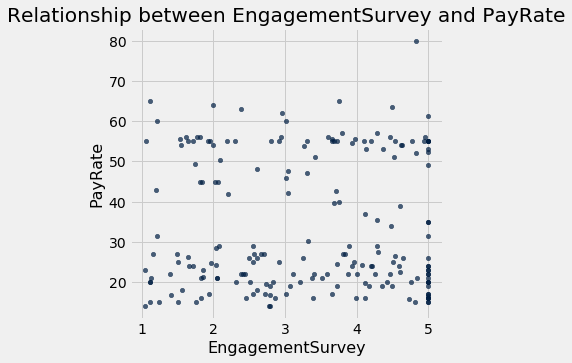

In [5]:
# Use this cell to generate your quantitative plot
emp_info.scatter('EngagementSurvey', 'PayRate')
plots.title('Relationship between EngagementSurvey and PayRate');

Based on this plot, there is no strong linear assocation between the two variables. Our linear model is unlikely to perform well.

**Qualitative Plot:**

Before beginning our statistical analyses, we should make sure that the randomly sampled positions are an accurate representation of the company. The bar chart displays a bar for each position. We verify this by counting the number of people from each position. Since this is a random sample, we expect the proportions of people by different gender from each position in our sample to be similar to the true proportion of people per position.

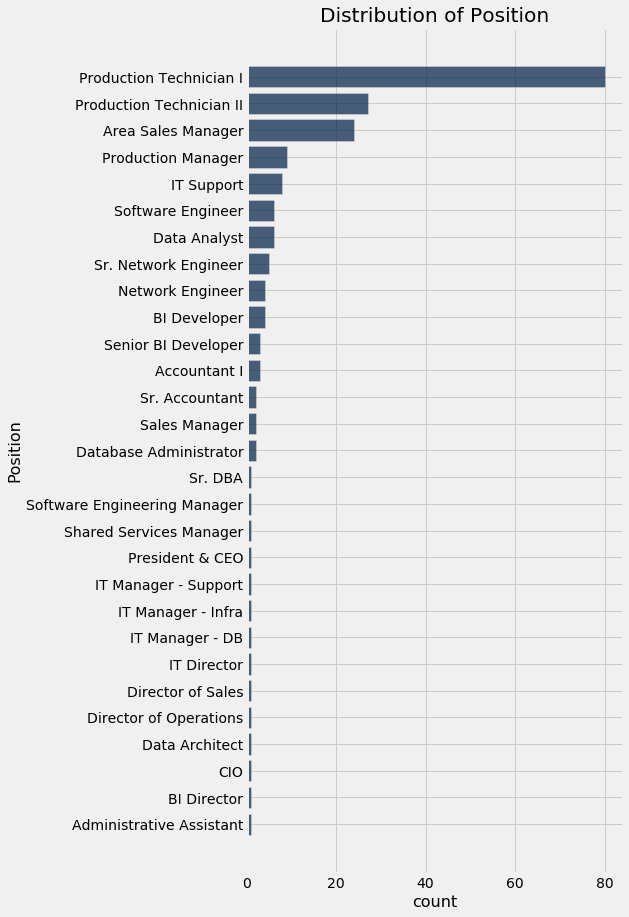

In [6]:
# Use this cell to generate your qualitative plo# Use this cell to generate your qualitative plot
full_data.group('Position').sort('count', descending = True).barh('Position')
plots.title("Distribution of Position");

**Aggregated Data Table:**

We generate a pivot table of employees' position and their gender status so that we can employ an A/B test for our hypothesis question. And it allows us to compare if every position has similar numbers of male and female employees. If not, the result of our testing might be invalid and our analysis might include biases.

In [7]:
# Use this cell to generate your aggregated data table
full_data.pivot('GenderID', 'Position').show()

Position,0.0,1.0
Accountant I,1,2
Administrative Assistant,1,0
Area Sales Manager,10,14
BI Developer,1,3
BI Director,0,1
CIO,1,0
Data Analyst,3,3
Data Architect,1,0
Database Administrator,2,0
Director of Operations,1,0


The resulting table's values indicate that there a roughly equal number of males and females in each position.

## Hypothesis Testing

We perform the hypothesis test which is to determine whether there is an association between employees’ gender status and their hourly pay rate using an A/B test. Our null hypothesis is that there is no association between the two variables. And the alternatives hypothesis is that there is an association between the two variables and male employees have higher pay rates than females on average. Our test statistic will be the difference in the average pay rate of male and female employees. We employe a significance cutoff of 5%.

P-value:              0.03
Observed difference:  4.309914819376033


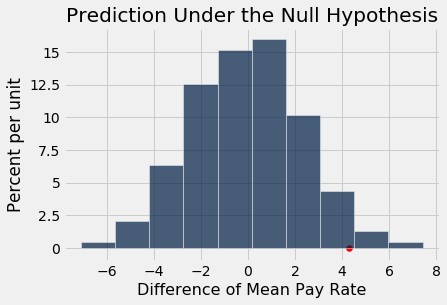

In [8]:
# set the random seed so that results are reproducible
random.seed(1231)

# the following function computes the test statistic for a given sample
def difference_of_means(table, label, group_label):
    """Takes: table's name, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    return means.item(1) - means.item(0)

# The observed test statistic we computed using the above function
observed_test_stat = difference_of_means(full_data, 'PayRate', 'GenderID')


# we define a function to permute the gender labels
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')


# The A/B testing procedure by simulating the test statistic's distribution under the null
repititons = 1000
differences  = make_array()

for i in np.arange(repititons):
    difference = one_simulated_difference(full_data, 'PayRate', 'GenderID')
    differences = np.append(differences, difference)

# visualiziton of the results
Table().with_column('Difference of Mean Pay Rate', differences).hist()
plots.title('Prediction Under the Null Hypothesis')
plots.scatter(observed_test_stat, 0, color='red');

# Calculated p-value
p_value = np.count_nonzero(observed_test_stat <= differences) / repititons
print('P-value:             ', p_value)
print('Observed difference: ', observed_test_stat)

The conclusion of the test is that the data favor the alternative over the null. First, the empirical P-value is around 3%, we would reject the null hypothesis since the P-value is smaller than our cut-off. Second, The observed difference in the original sample is about 4.3, but the observed value of the test statistics is quite far away from the heart of the distribution. By any reasonable cutoff for what is "small", the empirical P-value is small. The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent. Thus, we conclude that male employees have a higher pay rate on average.

## Prediction

We will perform linear regression on our human resource data to determine whether we can accurately predict the pay rate of the company’s employees based on engagement surveys. First, we will use the linear regression model to predict the fitted values to find the regression line by taking the table and the labels of pay rate and engagement survey. Second, we want to use residual plots to help us make visual assessments of the quality of a linear regression analysis. To see how well this method of estimation performs, we measure how far off the estimates are from the actual values. Given the result of our exploratory data analysis, we do not expect linear regression to perform well.

**Pay rate and Engagement survey**

In [9]:
# set the random seed so that results are reproducible
random.seed(1231)                                                

# Create a new table of PayRate and EngagementSurvey
payrate_engagementsurvey = Table().with_columns('PayRate', full_data.column('PayRate'),
                                                'EngagementSurvey', full_data.column('EngagementSurvey'))

# define the functions needed to fit the linear regression
def standard_units(array_of_num):
    """Converts a numeric array to standard units."""
    standardized_array = (array_of_num - np.mean(array_of_num)) / np.std(array_of_num)
    return standardized_array

def correlation(tbl, var1, var2):
    """Computes the correlation coefficient of two variables"""
    r = np.mean(standard_units(tbl.column(var1)) * standard_units(tbl.column(var2)))
    return r

def slope(tbl, x, y):
    """Compute the slope of the regression line. x is the independent variable, y the depenent variable."""
    r = correlation(tbl, x, y)
    m = r * np.std(tbl.column(y)) / np.std(tbl.column(x))
    return m

def intercept(tbl, x, y):
    """Compute the intercept of the regression line. x is the independent variable, y the depenent variable."""
    b = np.mean(tbl.column(y)) - slope(tbl, x, y) * np.mean(tbl.column(x))
    return b

def linear_fit(tbl, x, y):
    m = slope(tbl, x, y)
    b = intercept(tbl, x, y)
    return m * tbl.column(x) + b

print("The slope between EngagementSurvey and PayRate:      ", slope(payrate_engagementsurvey,'EngagementSurvey','PayRate'))
print("The intercept between EngagementSurvey and PayRate:  ", intercept(payrate_engagementsurvey,'EngagementSurvey','PayRate'))
print("The correlation between EngagementSurvey and PayRate:", correlation(payrate_engagementsurvey,'EngagementSurvey','PayRate'))

The slope between EngagementSurvey and PayRate:       0.1404782889752299
The intercept between EngagementSurvey and PayRate:   33.420881519045395
The correlation between EngagementSurvey and PayRate: 0.010914441924046479


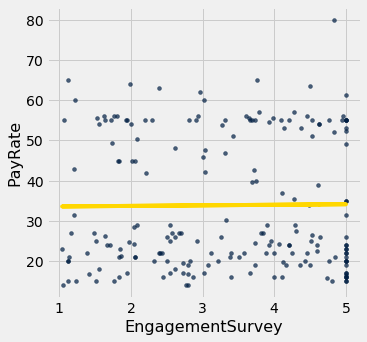

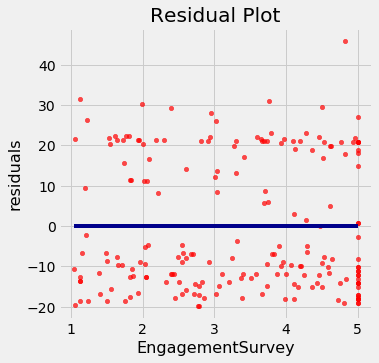

In [10]:
# fit the linear regression, store results in table
linear_regression_results = Table().with_columns(
    'EngagementSurvey', payrate_engagementsurvey.column('EngagementSurvey'),
    'PayRate', payrate_engagementsurvey.column('PayRate'),
    'Fitted Values', linear_fit(payrate_engagementsurvey, 'EngagementSurvey', 'PayRate'))

# plot the fitted results agains the true EngagementSurvey and PayRate
def scatter_plot(tbl, x, y):
    tbl.scatter(x, y, s=15)
    plots.plot(tbl.column(x), linear_fit(tbl, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)
scatter_plot(linear_regression_results,'EngagementSurvey','PayRate')

# plot the residuals results agains the true EngagementSurvey and PayRate
def residual_plot(tbl, x, y):
    x_array = tbl.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', tbl.column(y) - linear_fit(tbl, x, y)
        )
    t.scatter(x, 'residuals', color='red')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')
residual_plot(linear_regression_results,'EngagementSurvey','PayRate')

According to the plot and regression analysis, the linear relationship between engagement surveys and the pay rate is very weak, and our linear model performs very poorly. First, from the regression analysis, it indicated the two variables have positive and very weak associations regarding the correlation coefficient (0.01) we calculated. Second, the scatter plot shows a weakly linear relationship since our prediction of the pay rate based on the engagement survey not followed the regression line. Besides, the residual plot shows uneven variation about the horizontal line at 0 and shows a pattern, it means that the regression estimates are not equally accurate across the range of the predictor variable, so it emphasizes the non-linear relationship between the two variables. As a result, we predict that the value of the pay rate may tends to not be changed as the value of engagement surveys increases based on the sample data.

## Conclusion

In this research report, we attempt to determine the company's salary factors related to employee gender roles and engagement surveys. Through the A/B testing procedure, we proved that the company’s gender role has an association with its salary level. On average, men’s salaries in companies are higher than women’s. We also explain the changes in the company’s employee engagement surveys through a linear relationship with its salary rate. However, we found that the model is a non-linear relationship. The correlation between these two variables is very low. We predict that there is weak relationship between survey participation and salary rate.

Although the project data provided us with a clean data set, during the exploratory data analysis process, we noticed that no one in the company terminated their job and that all employees had not been absent in the past 30 days ("Termd" and "DaysLateLast30" in the data set were all "0"). If this is not due to accidental factors alone, their lack of representativeness in our data may seriously affect our findings. To solve this problem, we recommend collecting a new data set with two columns containing information about employee attendance and resignation. Then, if we re-run the analysis in this notebook, we might have various results.

## Presentation

*In this section, you'll need to provide a link to your video presentation. If you've uploaded your presentation to YouTube,
you can include the URL in the code below. We've provided an example to show you how to do this. Otherwise, provide the link
in a markdown cell.*

**Link:** *Replace this text with a link to your video presentation*

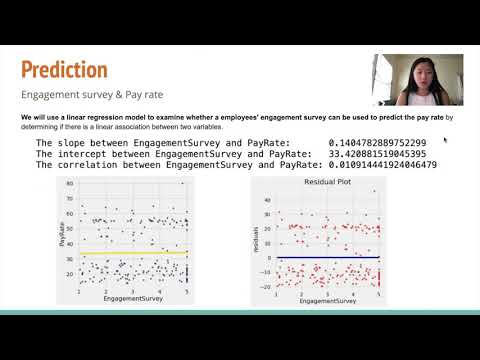

In [11]:
# Full Link: https://youtu.be/-RtPe54Ie-8
# Plug in string between "v=" and ""&feature":
YouTubeVideo("-RtPe54Ie-8")